In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

pd.set_option('display.max_columns',30)

In [2]:
data=pd.read_csv(r'C:\Users\Tunzale\Desktop\DSDS\yeni\Life Expectancy Data (1).csv')
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8,45.3


In [3]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [4]:
data.describe(include='all')

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
count,2938,2938.000000,2938,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000,2928.000000
unique,193,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,NaN,Developing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,16,NaN,2426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2007.518720,NaN,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793,69.224932
std,NaN,4.613841,NaN,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920,9.523867
min,NaN,2000.000000,NaN,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000,36.300000
25%,NaN,2004.000000,NaN,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000,63.100000
50%,NaN,2008.000000,NaN,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000,72.100000
75%,NaN,2012.000000,NaN,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000,75.700000


In [5]:
data.corr()['Life expectancy ']

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_12440\299320172.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Life expectancy ']


Year                               0.170033
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Life expectancy                    1.000000
Name: Life expectancy , dtype: float64

In [6]:
data.corr()['Life expectancy '].mean()

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_12440\3306492184.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()['Life expectancy '].mean()


0.15413399470891614

In [7]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy '],
      dtype='object')

In [8]:
data=data[['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Life expectancy ']]

In [9]:
data=data.reset_index(drop=True)

In [10]:
data.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
Life expectancy                    float64
dtype: object

In [11]:
data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Life expectancy                     10
dtype: int64

In [12]:
data['Adult Mortality']=data['Adult Mortality'].fillna(data['Adult Mortality'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [13]:
data['Alcohol']=data['Alcohol'].fillna(data['Alcohol'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [14]:
data['Hepatitis B']=data['Hepatitis B'].fillna(data['Hepatitis B'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [15]:
data[' BMI ']=data[' BMI '].fillna(data[' BMI '].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [16]:
data['Polio']=data['Polio'].fillna(data['Polio'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [17]:
data['Total expenditure']=data['Total expenditure'].fillna(data['Total expenditure'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [18]:
data['Diphtheria ']=data['Diphtheria '].fillna(data['Diphtheria '].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [19]:
data['GDP']=data['GDP'].fillna(data['GDP'].mean())
data


,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [20]:
data[' thinness  1-19 years']=data[' thinness  1-19 years'].fillna(data[' thinness  1-19 years'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [21]:
data[' thinness 5-9 years']=data[' thinness 5-9 years'].fillna(data[' thinness 5-9 years'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [22]:
data['Income composition of resources']=data['Income composition of resources'].fillna(data['Income composition of resources'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [23]:
data['Schooling']=data['Schooling'].fillna(data['Schooling'].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [24]:
data['Life expectancy ']=data['Life expectancy '].fillna(data['Life expectancy '].mean())
data

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Life expectancy
0,Afghanistan,2015,Developing,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,65.0
1,Afghanistan,2014,Developing,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,59.9
2,Afghanistan,2013,Developing,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,59.9
3,Afghanistan,2012,Developing,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,59.5
4,Afghanistan,2011,Developing,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,59.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,9.4,9.4,0.407,9.2,44.3
2934,Zimbabwe,2003,Developing,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,9.8,9.9,0.418,9.5,44.5
2935,Zimbabwe,2002,Developing,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,1.2,1.3,0.427,10.0,44.8
2936,Zimbabwe,2001,Developing,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,1.6,1.7,0.427,9.8,45.3


In [25]:
data.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Life expectancy                    0
dtype: int64

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data[[ 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       ' HIV/AIDS', ' thinness  1-19 years'
       ]]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]

vif["Features"] = variables.columns
vif

,VIF,Features
0,3.373554,Adult Mortality
1,1.723038,infant deaths
2,2.798363,Alcohol
3,1.343544,percentage expenditure
4,1.394379,Measles
5,3.124107,BMI
6,1.543401,HIV/AIDS
7,2.671235,thinness 1-19 years


In [27]:
data.columns

Index(['Country', 'Year', 'Status', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Life expectancy '],
      dtype='object')

In [28]:
data=data[['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       ' HIV/AIDS', ' thinness  1-19 years',
        'Life expectancy ']]

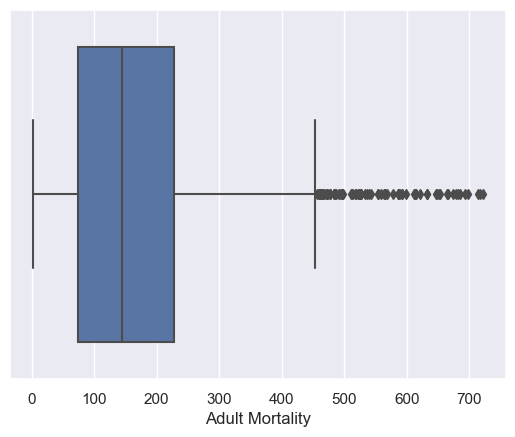

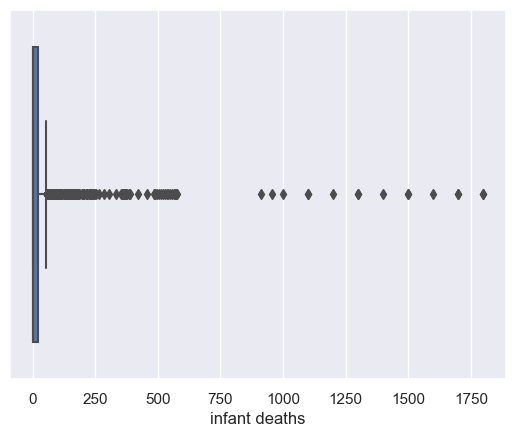

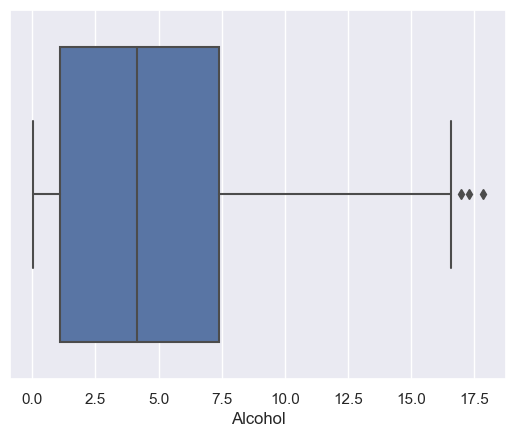

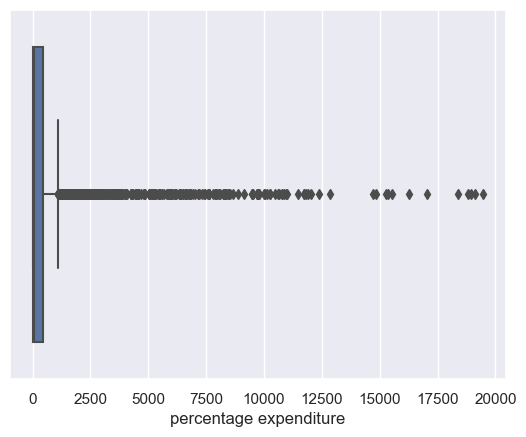

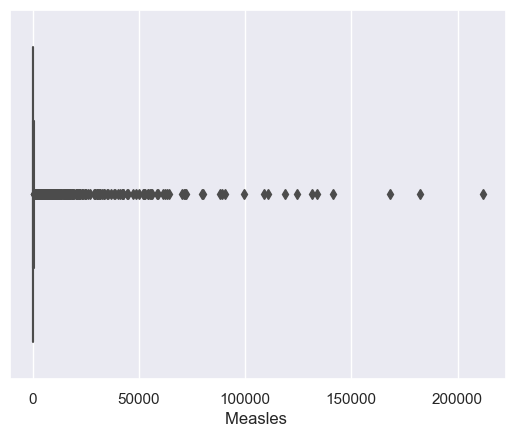

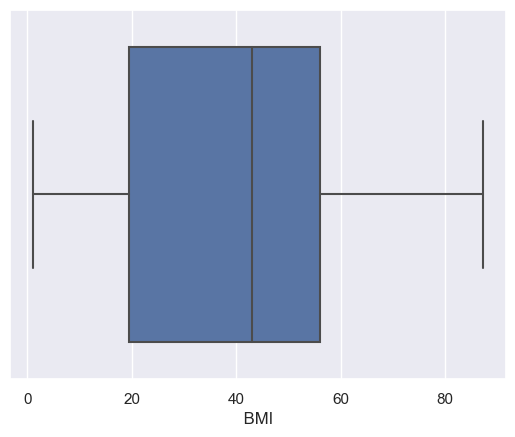

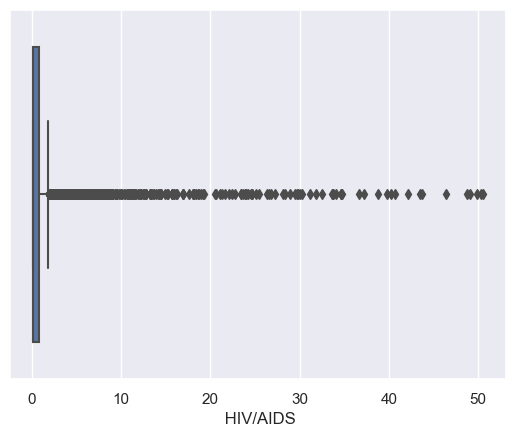

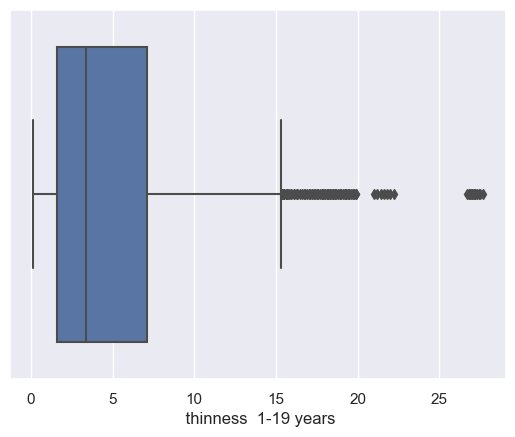

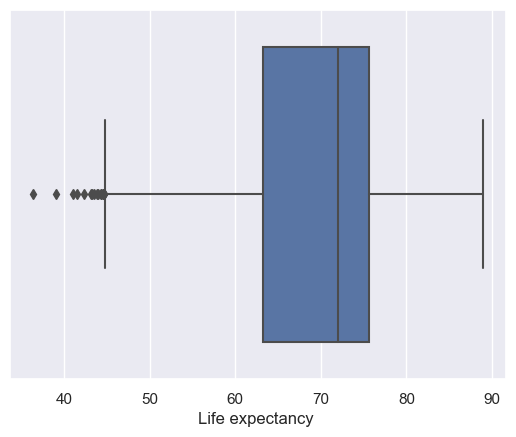

In [29]:
for i in data[[ 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       ' HIV/AIDS', ' thinness  1-19 years',
        'Life expectancy ']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [30]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

In [31]:
Lower

Adult Mortality          -155.50000
infant deaths             -33.00000
Alcohol                    -8.35375
percentage expenditure   -650.58786
Measles                  -540.37500
 BMI                      -35.65000
 HIV/AIDS                  -0.95000
 thinness  1-19 years      -6.65000
Life expectancy            44.60000
dtype: float64

In [32]:
Upper

Adult Mortality            456.500000
infant deaths               55.000000
Alcohol                     16.836250
percentage expenditure    1096.807347
Measles                    900.625000
 BMI                       111.150000
 HIV/AIDS                    1.850000
 thinness  1-19 years       15.350000
Life expectancy             94.200000
dtype: float64

In [33]:
for i in data[['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       ' HIV/AIDS', ' thinness  1-19 years',
        'Life expectancy ']]:
    data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
    data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])
    

C:\Users\Tunzale\AppData\Local\Temp\ipykernel_12440\3094888940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i]>Upper[i],Upper[i],data[i])
C:\Users\Tunzale\AppData\Local\Temp\ipykernel_12440\3094888940.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i]=np.where(data[i]<Lower[i],Lower[i],data[i])


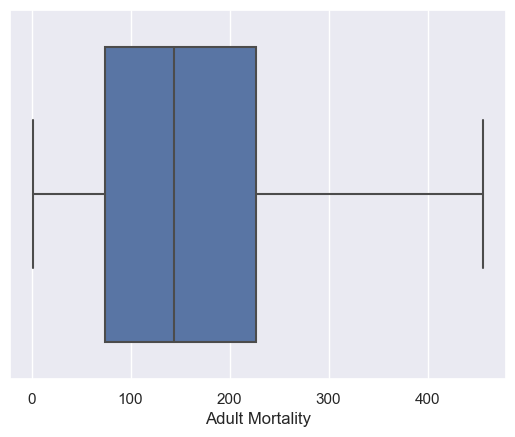

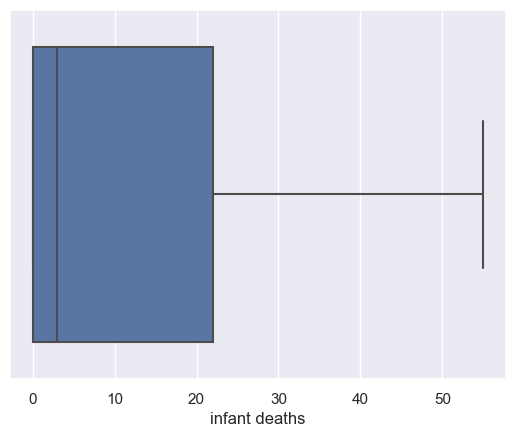

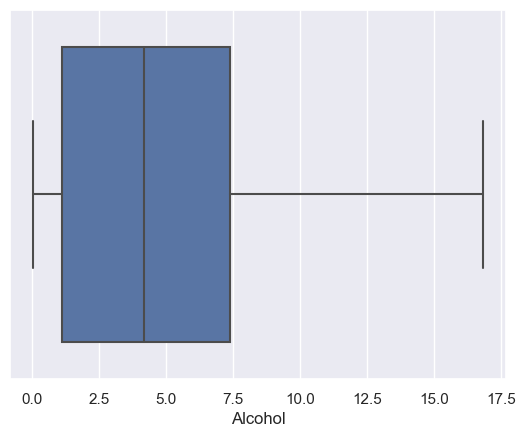

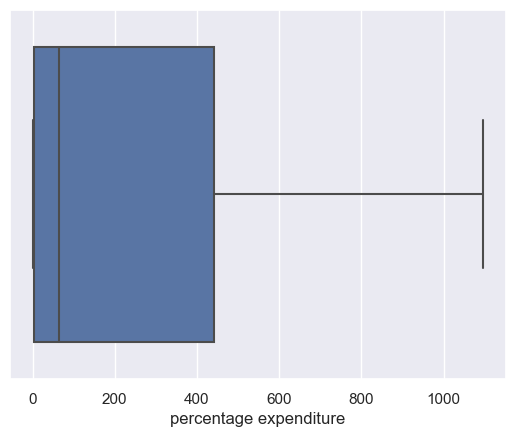

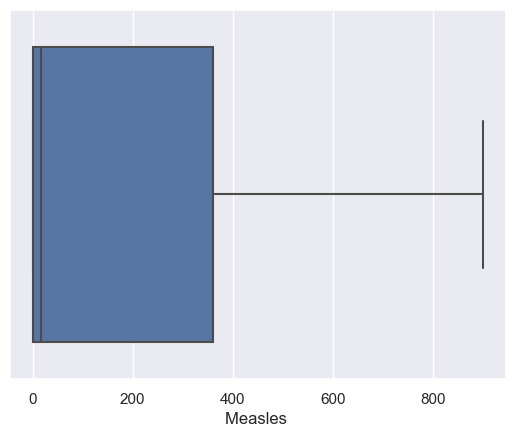

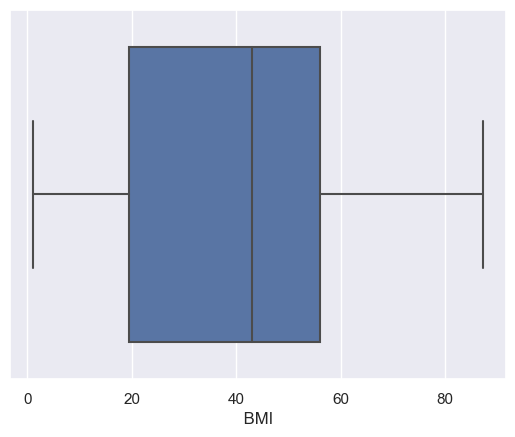

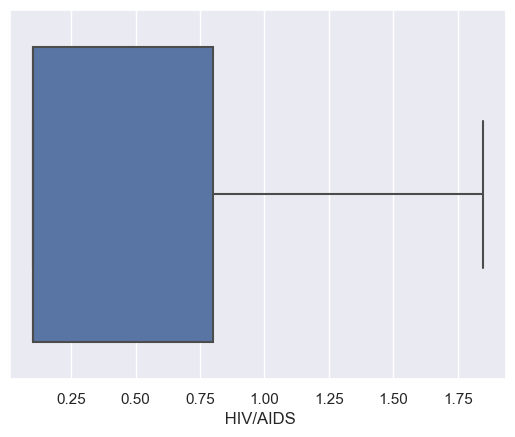

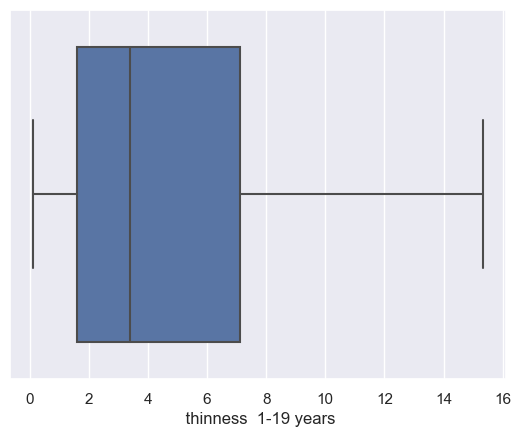

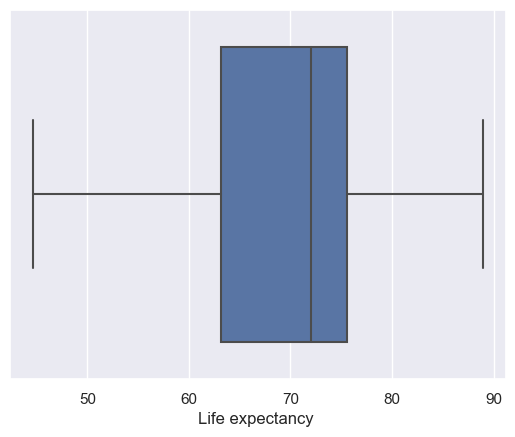

In [34]:
for i in data[['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       ' HIV/AIDS', ' thinness  1-19 years',
        'Life expectancy ']]:
    sns.boxplot(data=data,x=data[i])
    plt.show()

In [35]:
data=pd.get_dummies(data,drop_first=True)
data

,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Measles,BMI,HIV/AIDS,thinness 1-19 years,Life expectancy
0,263.0,55.0,0.01,71.279624,900.625,19.1,0.10,15.35,65.0
1,271.0,55.0,0.01,73.523582,492.000,18.6,0.10,15.35,59.9
2,268.0,55.0,0.01,73.219243,430.000,18.1,0.10,15.35,59.9
3,272.0,55.0,0.01,78.184215,900.625,17.6,0.10,15.35,59.5
4,275.0,55.0,0.01,7.097109,900.625,17.2,0.10,15.35,59.2
...,...,...,...,...,...,...,...,...,...
2933,456.5,27.0,4.36,0.000000,31.000,27.1,1.85,9.40,44.6
2934,456.5,26.0,4.06,0.000000,900.625,26.7,1.85,9.80,44.6
2935,73.0,25.0,4.43,0.000000,304.000,26.3,1.85,1.20,44.8
2936,456.5,25.0,1.72,0.000000,529.000,25.9,1.85,1.60,45.3


In [36]:
targets = data['Life expectancy ']

inputs = data[['Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Measles ', ' BMI ',
       ' HIV/AIDS', ' thinness  1-19 years']]

In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [38]:
from sklearn import metrics

def evaluate(model, x_test, y_test):
    
    y_pred = model.predict(x_test)
    
    mae_test = metrics.mean_absolute_error(y_test, y_pred)
    mse_test = metrics.mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = metrics.r2_score(y_test, y_pred)


    y_pred_train = model.predict(x_train)

    mae_train = metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train = metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)


    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [39]:
from sklearn.svm import SVR

base_model = SVR()
base_model.fit(x_train, y_train)
base_accuracy = evaluate(base_model, x_test, y_test)

  Metric      Train       Test
0    MAE   3.658579   3.596144
1    MSE  32.523758  32.335397
2   RMSE   5.702960   5.686422
3     R2  64.121428  62.621918


In [40]:
from sklearn.model_selection import RandomizedSearchCV

kernel = ['linear', 'poly', 'rbf', 'sigmoid']
gamma = ['scale', 'auto'] 
C = [1, 10, 100, 1e3, 1e4, 1e5, 1e6]
epsilon = [0.1 , 0.01, 0.001, 0.0001]
random_grid = {'kernel': kernel,
               'gamma': gamma,
               'C': C,
               'epsilon': epsilon}
print(random_grid)

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'gamma': ['scale', 'auto'], 'C': [1, 10, 100, 1000.0, 10000.0, 100000.0, 1000000.0], 'epsilon': [0.1, 0.01, 0.001, 0.0001]}


In [ ]:
svr_random = RandomizedSearchCV(estimator = base_model, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=1, n_jobs = -1)
svr_random.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [ ]:
svr_random.best_params_

In [ ]:
optimized_model = svr_random.best_estimator_
optmized_accuracy = evaluate(optimized_model, x_test, y_test)

In [ ]:
 variables = []
train_r2_scores = []
test_r2_scores = []

for i in x_train.columns: 
    X_train_single_var = x_train[[i]]
    X_test_single_var = x_test[[i]]
    optimized_model.fit(X_train_single_var, y_train)
    y_pred_train_single_var = optimized_model.predict(X_train_single_var)
    train_r2 = metrics.r2_score(y_train, y_pred_train_single_var)
    y_pred_test_single_var = optimized_model.predict(X_test_single_var)
    test_r2 = metrics.r2_score(y_test, y_pred_test_single_var)
    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted